In [90]:
import matplotlib as mpl
import torch
import warnings
import matplotlib
import matplotlib.pyplot as plt
from sys import platform
from datasets.datasets import ExtremeBimodalDataGenerator, SmoothBimodalDataGenerator
warnings.filterwarnings("ignore")
import numpy as np
mpl.rcParams["legend.framealpha"] = 1
matplotlib.rc('font', **{'size': 15})
import seaborn as sns
import pandas as pd
%load_ext autoreload
%autoreload 2

device_name = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data visualization

In [2]:
def plot_pdf(sample, label=None, n_bins = 80):
    a,b = np.histogram(sample, bins=n_bins) 
    area = sum(a[i] * (b[i+1] - b[i]) for i in range(len(b)-1))
    a = a / area
    b = [(b[i] + b[i+1]) /2 for i in range(len(b)-1)]
    args = {}
    if label is not None:
        args['label'] = label
    plt.plot(b, a, **args)

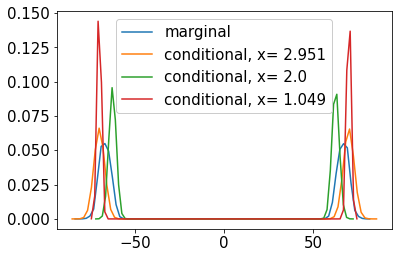

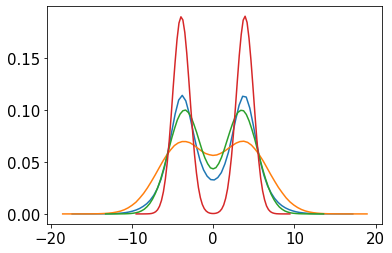

In [91]:
x_dim = 5
for i, data_generator in enumerate([ExtremeBimodalDataGenerator(x_dim), SmoothBimodalDataGenerator(x_dim)]):
    data_generator.beta2 = data_generator.beta
    n_samples = 10000000
    x,y = data_generator.generate_data(n_samples=n_samples, device='cpu')
    plot_pdf(y, 'marginal')

    x,y = data_generator.generate_data(n_samples=n_samples, device='cpu', x=torch.ones(n_samples, x_dim)*-0.7)
    x = np.round(torch.sin(torch.ones(x_dim)*-.7@data_generator.beta*2*np.pi).item()+2, 3)
    plot_pdf(y, f'conditional, x= {x}')
    
    x,y = data_generator.generate_data(n_samples=n_samples, device='cpu', x=torch.ones(n_samples, x_dim)*0.)
    x = np.round(torch.sin(torch.ones(x_dim)*0.@data_generator.beta*2*np.pi).item()+2, 3)
    plot_pdf(y, f'conditional, x= {x.item()}')
    
    x,y = data_generator.generate_data(n_samples=n_samples, device='cpu', x=torch.ones(n_samples, x_dim)*0.7)
    x = np.round(torch.sin(torch.ones(x_dim)*0.7@data_generator.beta*2*np.pi).item()+2, 3)
    plot_pdf(y, f'conditional, x= {x.item()}')
    if i == 0:
        plt.legend()
    plt.show()

# Data + noise visualization

noise unscaled variance:  2.082228422164917


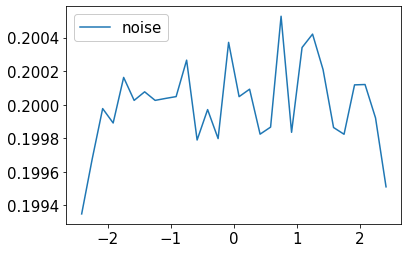

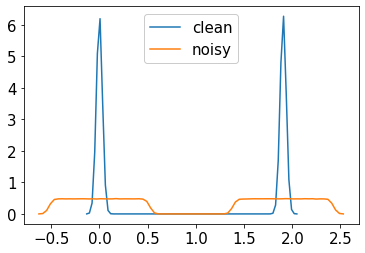

noise scaled variance:  0.09089628607034683
noisy data unscaled std:  65.58906555175781
clean data scaled variance:  0.9999999403953552
clean median:  0.16182351112365723
clean mean:  0.9529063701629639
noisy median:  0.6380968689918518
noisy mean:  0.9530566930770874


In [92]:
area_from = 0+0.9
area_to = 8 - .9
n_bins = 80
m = torch.distributions.Beta(torch.FloatTensor([1]), torch.FloatTensor([1]))


s3 =  torch.rand((20000000,)).squeeze()*5 #m.sample((2000000,)).squeeze()*15 # m.sample((2000000,)).squeeze()*15 # torch.rand((2000000,)).squeeze()*5
s3 -= s3.mean()
plot_pdf(s3, label='noise', n_bins=30)
# plt.ylim(0,1)
plt.legend()
print("noise unscaled variance: ", torch.var(s3).item())
plt.show()

s1 = torch.randn(1000000)*2 + 125  # 7, 125
s2 =  torch.randn(1000000)*2 + 0 # m.sample((1000000,)).squeeze()*4 #( torch.randn(1000000) + 1)
s = torch.cat([s1, s2])
s = s[torch.randperm(len(s))]



s_clean = s.clone()
s3 = s3[:len(s)]
s3 /= s3.std()
s3 *= np.sqrt(0.1)*s.std()
s = s + s3
s_std =  s.std()
s = s / s_std
s3 = s3 / s_std
s_clean = s_clean / s_std



plot_pdf(s_clean, label='clean', n_bins=n_bins)
plot_pdf(s, label='noisy', n_bins=n_bins)
plt.legend()
plt.show()

# a,b = np.histogram(s_clean.squeeze(), bins=n_bins) 
# area = sum(a[i] * (b[i+1] - b[i]) for i in range(len(b)-1))
# a = a / area
# sub_area = sum(a[i] * (b[i+1] - b[i]) for i in range(len(b)-1) if b[i] >= area_from and b[i+1] <= area_to)
# print(f"clean s area under {area_from}--{area_to}: ", sub_area)


print("noise scaled variance: ", torch.var(s3).item())

print("noisy data unscaled std: ", s_std.item())
print("clean data scaled variance: ", torch.var(s).item())

print("clean median: ", torch.median(s_clean).item())
print("clean mean: ", torch.mean(s_clean).item())

print("noisy median: ",torch.median(s).item())
print("noisy mean: ", torch.mean(s).item())

# plt.xlim(0,1)



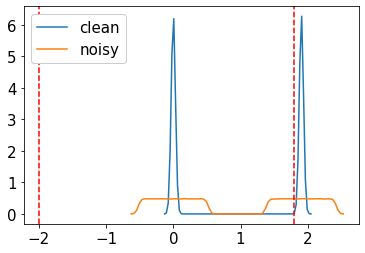

In [93]:
interval =   [-2, 1.8]   # 0.1  [0.1, 1.8], [-2, 1.8], [-0.05, 2] [-0.5, 2.25]          [-1, 2.5]
plot_pdf(s_clean, label='clean', n_bins=n_bins)
plot_pdf(s, label='noisy', n_bins=n_bins)
# plt.xlim(interval[0] -v, interval[1] +v)
plt.axvline(x=interval[0], color='r', linestyle='--')
plt.axvline(x=interval[1], color='r', linestyle='--')
plt.legend()
plt.show()

min second derivative: q= -0.025
max second derivative: Q= 0.028
intersection point: (-2.0,0.05)


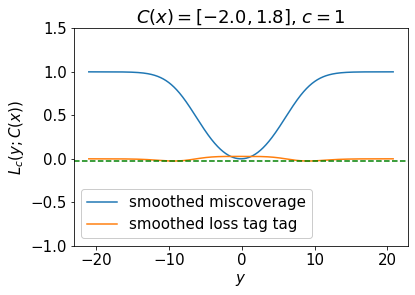

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Cantelli's bound: (valid since 0.05 >= 0.028)


<IPython.core.display.Latex object>

Improved markov: (p=0.65)


<IPython.core.display.Latex object>

valid improved markov: (p=0.75)


<IPython.core.display.Latex object>

standard markov with: (p=0.75)


<IPython.core.display.Latex object>

min second derivative: q= -0.438
max second derivative: Q= 0.292
intersection point: (-2.0,0.05)


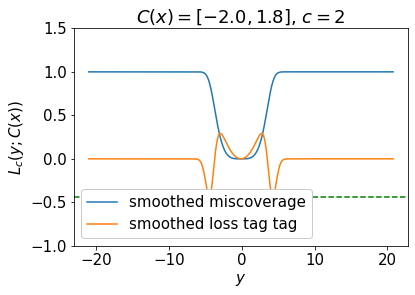

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Cantelli's bound: (valid since 0.05 >= 0.031)


<IPython.core.display.Latex object>

Improved markov: (p=0.5)


<IPython.core.display.Latex object>

valid improved markov: (p=0.5)


<IPython.core.display.Latex object>

standard markov with: (p=0.5)


<IPython.core.display.Latex object>

In [94]:
from IPython.display import display, Latex
from losses import SmoothedMiscoverageLoss, MiscoverageLoss
scaled_noise_variance = 0.1
d = 0.1
c = 1
p=1
interval = torch.Tensor(interval)
for c in [1, 2]:
    if interval[0] == interval[1]:
        raise Exception("interval[0] == interval[1]")
    smoothed_loss_function = SmoothedMiscoverageLoss(c=c, d=d, p=p)
    def smoothed_L(y):
        return smoothed_loss_function.compute_loss(y, interval)
    v = (abs(interval[0]) + abs(interval[1])) *5
    y = torch.arange(interval[0] - v, interval[1] + v, 0.001)
    smoothed_loss = smoothed_loss_function.compute_loss(y, interval)
    smoothed_loss_tag = smoothed_loss_function.smoothed_L_tag(y, interval)
    smoothed_loss_tag_tag = smoothed_loss_function.smoothed_L_tag_tag(y, interval)

    q = smoothed_loss_function.min_second_derivative(interval, range=[-100, 100], step=0.00005).item()
    Q = smoothed_loss_function.max_second_derivative(interval, range=[-100, 100], step=0.00005).item()
    print("min second derivative: q=", np.round(q,3))
    print("max second derivative: Q=", np.round(Q,3))
    
    miscoverage_loss_function = MiscoverageLoss()
    loss = miscoverage_loss_function.compute_loss(y, interval)

    intersection_index = (y - interval[0]).abs().argmin()
    intersection_point = smoothed_loss_function.get_intersection_point()
    u,v = np.round(y[intersection_index].item(), 3), np.round(smoothed_loss[intersection_index].item(), 3)
    print(f"intersection point: ({u},{v})")


#     plt.plot(y, loss, label="miscoverage")
    plt.plot(y, smoothed_loss, label="smoothed miscoverage")
    # plt.plot(y, smoothed_loss_tag, label="smoothed loss tag")
    plt.plot(y, smoothed_loss_tag_tag, label="smoothed loss tag tag")
    plt.axhline(y=q, color='green', linestyle='--')
    plt.legend()
    plt.ylim(-1,1.5)
    plt.xlabel("$y$")
    plt.ylabel(f"$L_c(y;C(x))$")
    plt.title(f"$C(x)=[{np.round(interval[0].item(), 3)}, {np.round(interval[1].item(),3)}]$, $c={c}$")
    plt.show()


    clean_loss = np.round(miscoverage_loss_function.compute_loss(s_clean, interval).mean().item(), 5)
    noisy_loss = np.round(miscoverage_loss_function.compute_loss(s, interval).mean().item(), 3)

    clean_smoothed_loss = smoothed_L(s_clean).mean().item()
    noisy_smoothed_loss = smoothed_L(s).mean().item()

    clean_smoothed_loss_var = smoothed_L(s).var().item()

    cantelli_bound = clean_smoothed_loss_var / (clean_smoothed_loss_var + (intersection_point - clean_smoothed_loss)**2)

    rounded_clean_smoothed_loss = np.round(clean_smoothed_loss, 3)
    rounded_noisy_smoothed_loss = np.round(noisy_smoothed_loss, 3)

    best_L_bound = np.round(smoothed_L(s_clean).mean().item()/ intersection_point, 3)

    rounded_intersection_point = np.round(intersection_point, 3)

    delta =  np.round(noisy_smoothed_loss -clean_smoothed_loss, 3)
    guaranteed_delta = 0.5*q*scaled_noise_variance
    rounded_guaranteed_delta = np.round(guaranteed_delta, 3)

    clean_loss_bound = np.round((noisy_smoothed_loss- guaranteed_delta)/intersection_point, 3)

    display(Latex("$L(Y)="+f"{clean_loss}$"))
    display(Latex("$L(\\tilde{Y})="+f"{noisy_loss}$"))
    display(Latex("$\\delta="+f"{np.round(noisy_loss -clean_loss, 3)}$"))

    display(Latex("$L^{smoothed}(Y)="+f"{rounded_clean_smoothed_loss}$"))
    display(Latex("$\\alpha := L^{smoothed}(\\tilde{Y})="+f"{rounded_noisy_smoothed_loss}$"))

    display(Latex("$\\delta^{smoothed}="+f"{delta}$"))
    display(Latex(f"${delta}="+"\\delta^{smoothed} \\geq \\frac{1}{2}qVar(\\varepsilon)="+f"{rounded_guaranteed_delta}$"))

    display(Latex("$L(Y) \leq \\frac{\\alpha - \\frac{1}{2}qVar(\\varepsilon)}{" + str(rounded_intersection_point) +"} = \\frac{"+\
                  str(rounded_noisy_smoothed_loss)+" - "+str(rounded_guaranteed_delta) + "}{" + str(rounded_intersection_point) +"}="+ str(clean_loss_bound) + "$"))

    display(Latex("(cheat) $L(Y) \leq \\frac{L^{smoothed}(Y)}{" + str(rounded_intersection_point) +"} = \\frac{"+\
                  str(rounded_clean_smoothed_loss) + "}{" + str(rounded_intersection_point) +"}="+ str(best_L_bound) + "$"))

    text = "Cantelli's bound:"


    if intersection_point >= clean_smoothed_loss:
        text += f" (valid since {rounded_intersection_point} >= {rounded_clean_smoothed_loss})"
    else:
        text += f" (\033[1minvalid!!\033[0m since {rounded_intersection_point} < {rounded_clean_smoothed_loss})"

    print(text)

    display(Latex("(cheat) $L(Y) \leq \\frac{Var(L^{smoothed}(Y))}{Var(L^{smoothed}(Y)) + (" + str(rounded_intersection_point) +"-L^{smoothed}(Y))^2} = \\frac{"+\
                  str(np.round(clean_smoothed_loss_var, 3)) + "}{" + str(np.round(clean_smoothed_loss_var, 3)) +\
                  "+ ("+ str(rounded_intersection_point) + " - "+ str(rounded_clean_smoothed_loss) +")^2}="+ str(np.round(cantelli_bound,3)) + "$"))


    def find_best_p(get_pth_moment_bound):
        ps = [2,3,4, 5,6,7,8,9, 10]# 15, 20, 25, 30, 31, 32, 33, 34, 35]# list(np.arange(0.1, 5, 0.01))
        ps += list(np.arange(0.5, 2, 0.05))
        best_p = None
        best_bound = None
        for p in ps:
            p = np.round(p, 5)
            pth_moment_bound = get_pth_moment_bound(p)
            improved_markov = pth_moment_bound / (intersection_point ** p)
            if best_bound is None or improved_markov < best_bound:
                best_p = p
                best_bound = improved_markov
        return best_p, best_bound
    
    
    def get_pth_moment_bound(p):
        return (smoothed_L(s_clean)**p).mean().item()
    
    best_p, improved_markov = find_best_p(get_pth_moment_bound)
    pth_moment_bound = get_pth_moment_bound(best_p)
    print(f"Improved markov: (p={best_p})")
    display(Latex("(cheat) $L(Y) \leq \\frac{\mathbb{E}[L^{smoothed}(Y)^p]}{"+str(rounded_intersection_point)+"^p}"+\
              "=\\frac{"+str(np.round(pth_moment_bound,4))+"}{" + str(np.round(intersection_point ** best_p,4))+"}" +\
              "="+str(np.round(improved_markov,3)) + "$"))
    
    
    def get_pth_moment_bound(p):
        q2 = SmoothedMiscoverageLoss(c=c, d=d, p=p).min_second_derivative(interval).item()
        return (smoothed_L(s)**p).mean().item() - 0.5 * q2 * scaled_noise_variance
    
    best_p, valid_improved_markov = find_best_p(get_pth_moment_bound)
    pth_moment_bound = get_pth_moment_bound(best_p)
    print(f"valid improved markov: (p={best_p})")
    

    display(Latex("$L(Y) \leq \\frac{\mathbb{E}[L^{smoothed}(\\tilde{Y})^p-\\frac{1}{2}qVar(\\varepsilon)]}{"+\
                  str(rounded_intersection_point)+"^p}"+\
                  "=\\frac{"+str(np.round(pth_moment_bound,4))+"}{" + str(np.round(intersection_point ** best_p,4))+"}" +\
                  "="+str(np.round(valid_improved_markov,3)) + "$"))
    print(f"standard markov with: (p={best_p})")
    
    new_p_intersection_point = SmoothedMiscoverageLoss(c=c, d=d, p=best_p).get_intersection_point()
    display(Latex("$L(Y) \leq \\frac{\mathbb{E}[L^{smoothed}(\\tilde{Y})^p-\\frac{1}{2}qVar(\\varepsilon)]}{"+\
                  str(np.round(new_p_intersection_point,4))+"}"+\
                  "=\\frac{"+str(np.round(pth_moment_bound,4))+"}{" + str(np.round(new_p_intersection_point,4))+"}" +\
                  "="+str(np.round(pth_moment_bound / new_p_intersection_point,3)) + "$"))

# Display results

In [98]:
ds_type = 'syn'
ds_name = 'extreme_bimodal_x_dim_10'
results_dir = f'results/{ds_type}/{ds_name}'
seeds = 1
miscoverage_levels = [0.01, 0.02, 0.05, 0.1, 0.15] + list(np.arange(0.2, 0.9, 0.1)) + [0.9, 0.95, 0.98, 0.99]
total_df = pd.DataFrame()
for miscoverage_level in miscoverage_levels:
    for seed in range(seeds):
        miscoverage_level = np.round(miscoverage_level, 3)
        file_name = f"miscoverage_level={miscoverage_level}_seed={seed}.csv"
        try:
            df = pd.read_csv(f"{results_dir}/{file_name}").drop(['Unnamed: 0'], axis=1, errors='ignore')
        except:
            continue
        df['seed'] = seed
        total_df = pd.concat([total_df, df])
    
total_df = total_df.reset_index().drop(['index'], axis=1, errors='ignore')
total_df

,nominal_miscoverage_level,noisy_miscoverage,clean_miscoverage,noisy_smoothed_miscoverage,clean_smoothed_miscoverage,clean_miscoverage_bound,clean_smoothed_miscoverage_bound,noisy_best_smoothed_miscoverage,clean_best_smoothed_miscoverage,clean_miscoverage_best_bound,clean_smoothed_miscoverage_best_bound,cheat_clean_miscoverage_best_bound,cheat_improved_markov_clean_miscoverage_best_bound,best_p,seed,clean_improved_markov_miscoverage_best_bound
0,0.01,0.012000,0.000000,0.219551,0.223523,0.520226,0.240405,0.116230,0.078132,0.412049,0.182020,0.174619,0.903326,0.8,0,NaN
1,0.02,0.021333,0.000000,0.225110,0.229362,0.533489,0.246534,0.123101,0.083845,0.425214,0.187836,0.183183,0.913670,0.8,0,NaN
2,0.05,0.050333,0.000000,0.237008,0.242021,0.561887,0.259658,0.138001,0.096855,0.481724,0.212799,0.221910,0.950461,0.6,0,NaN
3,0.10,0.098500,0.000000,0.254787,0.261029,0.604418,0.279312,0.200977,0.168268,0.534244,0.270426,0.325041,0.890194,0.9,0,NaN
4,0.15,0.148167,0.000000,0.274162,0.281943,0.650813,0.300752,0.228771,0.198699,0.625296,0.316515,0.406508,0.947238,0.6,0,NaN
5,0.20,0.198333,0.000000,0.295401,0.305009,0.701846,0.324335,0.178660,0.169065,0.685531,0.215355,0.542723,0.928620,0.6,0,NaN
6,0.30,0.300000,0.002167,0.344557,0.359721,0.820463,0.379150,0.137250,0.137250,0.824824,0.148569,0.785501,0.518211,2.6,0,NaN
7,0.40,0.407500,0.203667,0.402043,0.425700,0.960505,0.443866,0.260759,0.272820,0.943466,0.273577,0.950512,0.119502,9.7,0,NaN
8,0.50,0.506667,0.777667,0.468897,0.506084,1.125832,0.520266,0.027990,0.028024,1.457779,0.036437,1.170648,0.996675,0.1,0,0.333297
9,0.60,0.613000,0.977667,0.551257,0.609618,1.334915,0.616887,0.035817,0.035785,1.738574,0.043455,1.449407,1.017975,0.1,0,0.397496


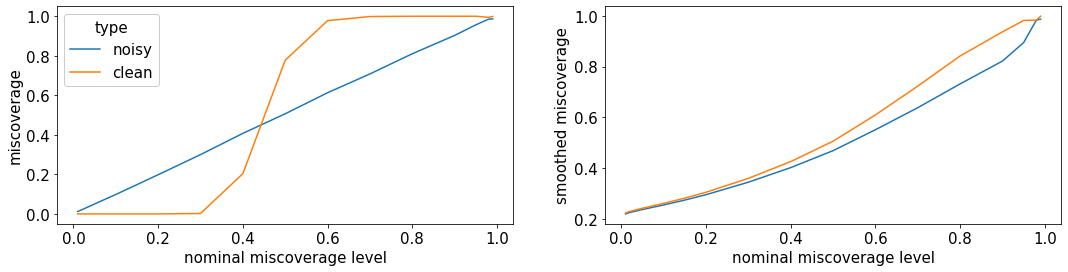

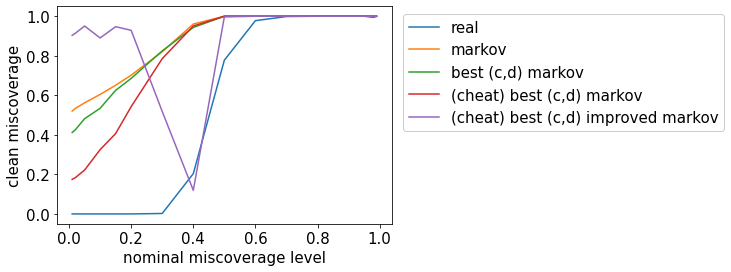

In [100]:
tmp_df = pd.DataFrame()
total_df['clean_miscoverage_bound'] = np.minimum(total_df['clean_miscoverage_bound'].to_numpy(), np.ones_like(total_df['clean_miscoverage_bound'].to_numpy()))
# total_df['clean_best_smoothed_miscoverage'] = np.minimum(total_df['clean_best_smoothed_miscoverage'].to_numpy(), np.ones_like(total_df['clean_best_smoothed_miscoverage'].to_numpy()))
total_df['cheat_clean_miscoverage_best_bound'] = np.minimum(total_df['cheat_clean_miscoverage_best_bound'].to_numpy(), np.ones_like(total_df['cheat_clean_miscoverage_best_bound'].to_numpy()))
total_df['clean_miscoverage_best_bound'] = np.minimum(total_df['clean_miscoverage_best_bound'].to_numpy(), np.ones_like(total_df['clean_miscoverage_best_bound'].to_numpy()))
total_df['clean_smoothed_miscoverage_bound'] = np.minimum(total_df['clean_smoothed_miscoverage_bound'].to_numpy(), np.ones_like(total_df['clean_smoothed_miscoverage_bound'].to_numpy()))

total_df['cheat_improved_markov_clean_miscoverage_best_bound'] = np.minimum(total_df['cheat_improved_markov_clean_miscoverage_best_bound'].to_numpy(), 
                                                                            np.ones_like(total_df['cheat_improved_markov_clean_miscoverage_best_bound'].to_numpy()))



fig, axes = plt.subplots(nrows=1, ncols = 2, figsize=(18,4))
# axes = [axes[0][0], axes[0][1], axes[1][0], axes[1][1]]
tmp_df1 = pd.DataFrame({
                        'nominal miscoverage level': total_df['nominal_miscoverage_level'], 
                        'miscoverage': total_df['noisy_miscoverage'], 
                        'smoothed miscoverage': total_df['noisy_smoothed_miscoverage'],     
                        'type': ['noisy'] * len(total_df),
                        })
tmp_df2 = pd.DataFrame({
                        'nominal miscoverage level': total_df['nominal_miscoverage_level'],
                        'miscoverage': total_df['clean_miscoverage'], 
                        'smoothed miscoverage': total_df['clean_smoothed_miscoverage'], 
                        'type': ['clean'] * len(total_df),
                       })
tmp_df = pd.concat([tmp_df1, tmp_df2])
sns.lineplot(data=tmp_df, x="nominal miscoverage level", y="miscoverage", hue="type", ax=axes[0])
sns.lineplot(data=tmp_df, x="nominal miscoverage level", y="smoothed miscoverage", hue="type", ax=axes[1])
# sns.lineplot(data=tmp_df, x="smoothed miscoverage", y="miscoverage", hue="type", ax=axes[2])
axes[1].legend().remove()
# axes[2].legend().remove()
plt.show()

# tmp_df1 = pd.DataFrame({
#                         'nominal miscoverage level': total_df['nominal_miscoverage_level'],     
#                         'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'],     
#                         'clean smoothed miscoverage': total_df['clean_smoothed_miscoverage'], 
#                         'type': ['real'] * len(total_df),
#                         })
# tmp_df2 = pd.DataFrame({
#                         'nominal miscoverage level': total_df['nominal_miscoverage_level'],    
#                         'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'],     
#                         'clean smoothed miscoverage': total_df['clean_smoothed_miscoverage_bound'], 
#                         'type': ['bound'] * len(total_df),
#                        })
# tmp_df = pd.concat([tmp_df1, tmp_df2])
# sns.lineplot(data=tmp_df, x="noisy smoothed miscoverage", y="clean smoothed miscoverage", hue="type")
# plt.show()


tmp_df1 = pd.DataFrame({
                        'nominal_miscoverage_level': total_df['nominal_miscoverage_level'], 
                        'clean miscoverage': total_df['clean_miscoverage'], 
                        'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'], 
                        'type': ['real'] * len(total_df),
                        })
tmp_df2 = pd.DataFrame({
                        'nominal_miscoverage_level': total_df['nominal_miscoverage_level'], 
                        'clean miscoverage': total_df['clean_miscoverage_bound'], 
                        'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'], 
                        'type': ['markov'] * len(total_df),
                        })
tmp_df3 = pd.DataFrame({
                        'nominal_miscoverage_level': total_df['nominal_miscoverage_level'],
                        'clean miscoverage': total_df['clean_miscoverage_best_bound'], 
                        'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'], 
                        'type': ['best (c,d) markov'] * len(total_df),
                       })
tmp_df4 = pd.DataFrame({
                        'nominal_miscoverage_level': total_df['nominal_miscoverage_level'],
                        'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'], 
                        'clean miscoverage': total_df['cheat_clean_miscoverage_best_bound'], 
                        'type': ['(cheat) best (c,d) markov'] * len(total_df),
                       })
tmp_df5 = pd.DataFrame({
                        'nominal_miscoverage_level': total_df['nominal_miscoverage_level'],
                        'noisy smoothed miscoverage': total_df['noisy_smoothed_miscoverage'], 
                        'clean miscoverage': total_df['cheat_improved_markov_clean_miscoverage_best_bound'], 
                        'type': ['(cheat) best (c,d) improved markov'] * len(total_df),
                       })
tmp_df = pd.concat([tmp_df1, tmp_df2, tmp_df3, tmp_df4, tmp_df5])
tmp_df = tmp_df.reset_index().drop(['index'], axis=1, errors='ignore')

tmp_df = tmp_df[tmp_df['nominal_miscoverage_level'] <= 1.]
tmp_df['nominal miscoverage level'] = tmp_df['nominal_miscoverage_level']
fig, axes = plt.subplots(nrows=1, ncols = 1)

sns.lineplot(data=tmp_df, x="nominal miscoverage level", y="clean miscoverage", hue='type', ax=axes)
lines_labels = [axes.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
plt.legend(lines, labels, bbox_to_anchor=(1.01,1), loc='upper left', ncol=1)
plt.show()


# sns.lineplot(data=tmp_df, x="noisy smoothed miscoverage", y="clean miscoverage bound", hue='type', ax=axes)
# lines_labels = [axes.get_legend_handles_labels()]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# plt.legend(lines, labels, bbox_to_anchor=(1.01,1), loc='upper left', ncol=1)
# plt.show()


# sns.relplot(data=total_df, x="nominal_miscoverage_level", y="noisy_miscoverage", kind="line")
# sns.relplot(data=total_df, x="nominal_miscoverage_level", y="clean_miscoverage", kind="line")